In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [3]:
baseline_K_val = [1, 4, 7, 11, 14]

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject="Xianyu")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_Xianyu/Baseline_results_train_with_{K}data_X.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/18 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
(8521, 4, 14, 1) (8521,) (86, 4, 14, 1) (86,)
Dataset 2/18 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
second (8521, 4, 14, 1) (8521,) (86, 4, 14, 1) (86,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 87.38%
Maximum validation accuracy : 94.19%
Accuracy of test dataset using model V0: 94.1860%
Dataset 3/18 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 77.1150%
Dataset 4/18 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 49.7191%
Dataset 5/18 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 74.7874%
Dataset 6/18 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 71.8401%
Dataset 7/18 - Session Exp_2025-06-30-v1/FEFFF6FFF5FF/
Accuracy on unseen dataset: 87.4550%
Dataset 8/18 - Session Exp_2025-06-30-v2/FEFFF6FFF5FF/
Accuracy on unseen dataset: 55.2359%
Dataset 9/18 - Session Exp_2025-07-01-v1/E9AD0

In [4]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '11', '14']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_Xianyu/Baseline_results_train_with_{K}data_X.csv')

SUBJECT = "Xianyu"

In [5]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)


Dataset 1/18 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.06%
Maximum validation accuracy : 88.87%

Dataset 2/18 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 82.57%
Maximum validation accuracy : 84.8%

Dataset 3/18 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.65%
Maximum validation accuracy : 84.36%

Dataset 4/18 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 69.52%
Maximum validation accuracy : 73.69%

Dataset 5/18 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 88.19%
Maximum validation

In [6]:
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_Xianyu/Train_Test_per_sessions.csv', index=False)

In [7]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 9.79%
Average of acc using previous test data after training: 70.78%
Average of acc using current test data after training: 84.34%
K-1: 75.56% | Target: 84.08
K-4: 73.95% | Target: 84.75
K-7: 77.20% | Target: 84.24
K-11: 82.81% | Target: 84.65
K-14: 77.36% | Target: 86.08


In [8]:
Trained_acc_all

[0.8886823058128357,
 0.8479753732681274,
 0.8436312079429626,
 0.7368913888931274,
 0.9067816138267517,
 0.8506602644920349,
 0.8410304188728333,
 0.8398584723472595,
 0.8463499546051025,
 0.8508223295211792,
 0.803471028804779,
 0.7175925970077515,
 0.8545581102371216,
 0.9101879596710205,
 0.8504521250724792,
 0.8478209972381592,
 0.8806489109992981,
 0.8644382357597351]

In [11]:
np.array(baseline_result['Info'])

array(['Stand (6/24)', 'Sit_chair (6/24)', 'Stand (6/26)',
       'Sit_chair (6/26)', 'Stand (6/27)', 'Sit_chair (6/27)',
       'Stand (6/30)', 'Sit_chair (6/30)', 'Stand (7/1)',
       'Sit_chair (7/1)', 'Stand (7/2)', 'Sit_chair (7/2)', 'Stand (7/9)',
       'Sit_chair (7/9)', 'Stand (7/11)', 'Sit_chair (7/11)',
       'Stand (7/23)', 'Sit_chair (7/23)'], dtype=object)

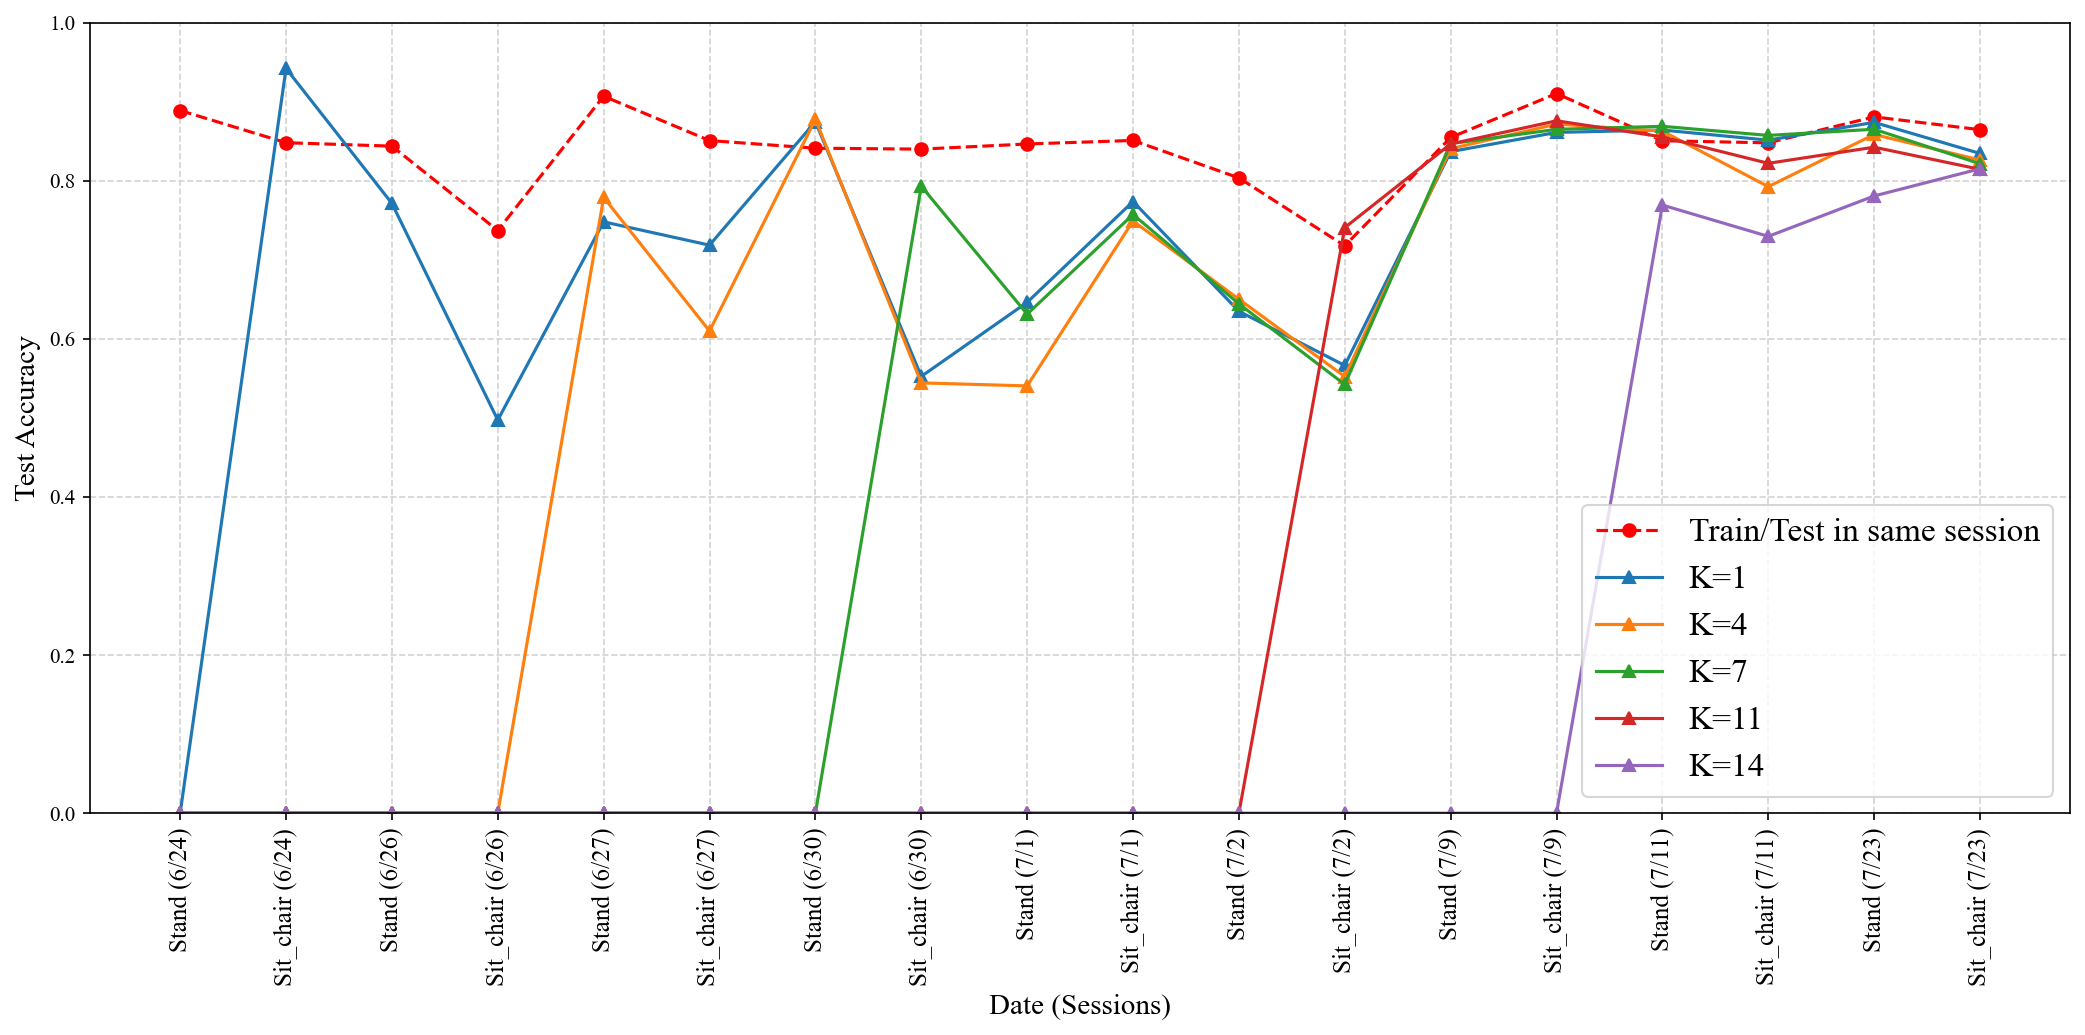

In [12]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.8886823058128357, 0.8479753732681274, 0.8436312079429626, 0.7368913888931274, 0.9067816138267517, 0.8506602644920349, 0.8410304188728333, 0.8398584723472595, 0.8463499546051025, 0.8508223295211792, 0.803471028804779, 0.7175925970077515, 0.8545581102371216, 0.9101879596710205,
 0.8504521250724792, 0.8478209972381592, 0.8806489109992981, 0.8644382357597351]

X_labels = ['Stand (6/24)', 'Sit_chair (6/24)', 'Stand (6/26)', 'Sit_chair (6/26)', 'Stand (6/27)', 'Sit_chair (6/27)',
       'Stand (6/30)', 'Sit_chair (6/30)', 'Stand (7/1)', 'Sit_chair (7/1)', 'Stand (7/2)', 'Sit_chair (7/2)', 'Stand (7/9)',
       'Sit_chair (7/9)', 'Stand (7/11)', 'Sit_chair (7/11)', 'Stand (7/23)', 'Sit_chair (7/23)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored, c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels, baseline_result['Accuracy'] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

plt.ylim([0, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=1)
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()